In [ ]:
!pip install sentence_transformers

In [ ]:
import torch
!nvidia-smi
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

###Multilingual predictions with plot


Word: gomma, Context: gomma per smacchiare, Score: 0.23, Image: image.0.jpg


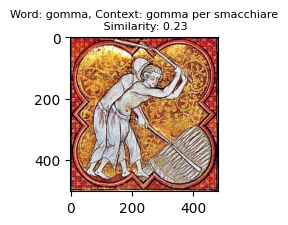


Word: asino, Context: asino gioco di carte, Score: 0.27, Image: image.18.jpg


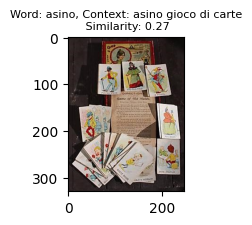


Word: colonna, Context: colonna missione, Score: 0.27, Image: image.22.jpg


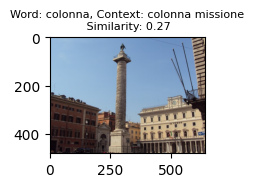


Word: box, Context: box per infanti, Score: 0.23, Image: image.34.jpg


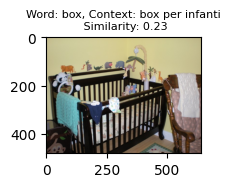


Word: bolla, Context: bolla di misurazione, Score: 0.28, Image: image.45.jpg


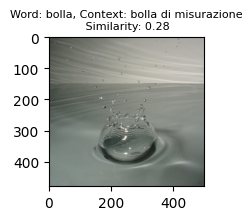


Word: banco, Context: banco scrivania, Score: 0.28, Image: image.52.jpg


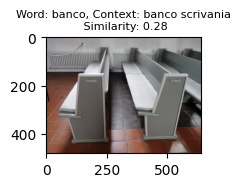


Word: durone, Context: durone arbusto, Score: 0.27, Image: image.67.jpg


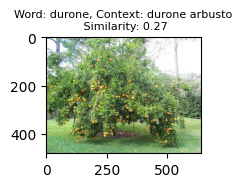


Word: alfiere, Context: alfiere si muove in diagonale, Score: 0.25, Image: image.73.jpg


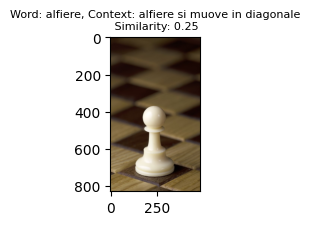


Word: chiocciola, Context: chiocciola strisciante, Score: 0.24, Image: image.85.jpg


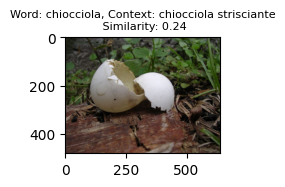


Word: aquila, Context: aquila stelle, Score: 0.26, Image: image.94.jpg


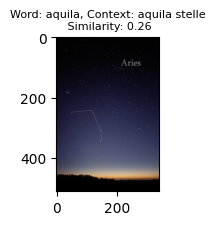


Word: esecuzione, Context: esecuzione esibizione, Score: 0.26, Image: image.106.jpg


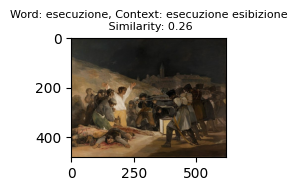


Word: medusa, Context: medusa d'acqua, Score: 0.31, Image: image.115.jpg


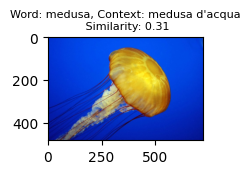


Word: cassa, Context: cassa da fuoco, Score: 0.28, Image: image.123.jpg


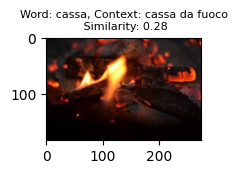


Word: bacino, Context: bacino lago, Score: 0.27, Image: image.138.jpg


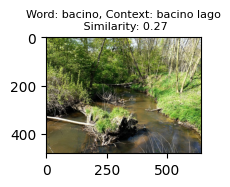


Word: barba, Context: barba acquatica, Score: 0.29, Image: image.144.jpg


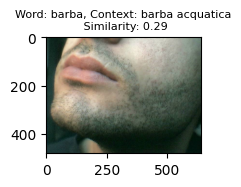


Word: mimosa, Context: mimosa natura, Score: 0.3, Image: image.158.jpg


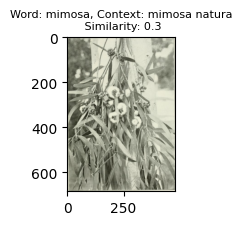


Word: ariete, Context: ariete di battaglia, Score: 0.26, Image: image.164.jpg


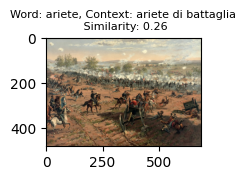


Word: iceberg, Context: iceberg di ghiaccio, Score: 0.33, Image: image.177.jpg


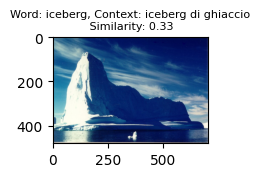

KeyboardInterrupt: 

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import os
import matplotlib.pyplot as plt

model_image = 'clip-ViT-B-32'
model_text = 'sentence-transformers/clip-ViT-B-32-multilingual-v1'
img_model = SentenceTransformer(model_image)
txt_model = SentenceTransformer(model_text)

image_folder_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/image/test_images_resized"

text_file_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/it.test.data.v1.1.txt"


with open(text_file_path, 'r') as file:
    lines = file.readlines()

for line in lines:

    word, context, *image_names = line.strip().split('\t')

    image_paths = [os.path.join(image_folder_path, image_name) for image_name in image_names]

    # Get embedding from the text
    text_embedding = txt_model.encode(context)

    images=[Image.open(img) for img in image_paths]

    # Map images to the vector space
    img_embeddings = img_model.encode(images)

    sim = util.cos_sim(text_embedding, img_embeddings)

    for imgs, scores in zip(images, sim):
        max_img_idx = torch.argmax(scores)
        score=scores[max_img_idx]
        best_img_path = os.path.basename(image_paths[max_img_idx])
        print(f"\nWord: {word}, Context: {context}, Score: {round(score.item(), 2)}, Image: {best_img_path}")


    # Display the image along with word and context
    selected_img = Image.open(image_paths[max_img_idx])
    plt.figure(figsize=(2, 2))
    plt.imshow(selected_img)
    plt.title(f"Word: {word}, Context: {context}\n Similarity: {round(score.item(), 2)}", fontsize=8)
    plt.show()

###English predictions with plot

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

image_folder_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/image/test_images_resized"

text_file_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/fa.test.data.v1.1.txt"


with open(text_file_path, 'r') as file:
    lines = file.readlines()

for line in lines:
    word, context, *image_names = line.strip().split('\t')

    image_paths = [os.path.join(image_folder_path, image_name) for image_name in image_names]

    # Initialize variables for the best image and its similarity score
    best_image_path = None
    max_similarity = -1.0

    # Process text
    text_inputs = processor(text=context, return_tensors="pt", padding=True)

    # Get features from the text
    text_features = model.get_text_features(**text_inputs)

    for image_path in image_paths:

        image = Image.open(image_path).convert("RGB")

        image_inputs = processor(images=image, return_tensors="pt", padding=True)

        image_features = model.get_image_features(**image_inputs)

        sim = torch.nn.functional.cosine_similarity(text_features, image_features, eps=1e-6)

        if sim.item() > max_similarity:
          max_similarity = sim.item()
          best_image_path = image_path

    selected_image = os.path.basename(best_image_path)
    print(f"\nWord: {word}, Context: {context}, Score: {round(max_similarity, 2)}, Image: {selected_image}")

    image = Image.open(best_image_path)
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(f"Word: {word}, Context: {context}\n Similarity: {round(max_similarity, 2)}", fontsize=8)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##CLIP

English

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

image_folder_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/image/test_images_resized"

text_file_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/en.test.data.v1.1.txt"

true_pred = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/en.test.gold.v1.1.txt"

true_labels_df = pd.read_csv(true_pred, header=None)

with open(text_file_path, 'r') as file:
    lines = file.readlines()

correct_predictions = 0
total_predictions = 0

for line in lines:
    word, context, *image_names = line.strip().split('\t')

    image_paths = [os.path.join(image_folder_path, image_name) for image_name in image_names]

    best_image_path = None
    max_similarity = -1.0

    text_inputs = processor(text=context, return_tensors="pt", padding=True).to(device)

    # Get features from the text
    text_features = model.get_text_features(**text_inputs)

    for image_path in image_paths:
        image = Image.open(image_path).convert("RGB")

        image_inputs = processor(images=image, return_tensors="pt", padding=True).to(device)

        image_features = model.get_image_features(**image_inputs)

        # compute the similarity between the image and text embeddings
        sim = torch.nn.functional.cosine_similarity(text_features, image_features, eps=1e-6)

        if sim.item() > max_similarity:
            max_similarity = sim.item()
            best_image_path = image_path

    # Extract the true image label from the CSV
    true_image_label = true_labels_df.iloc[total_predictions, 0]

    # Extract the predicted image label
    selected_image = os.path.basename(best_image_path)

    # Check if the predicted image matches the true image label
    if selected_image == true_image_label:
        correct_predictions += 1

    total_predictions += 1

    print(f"\nWord: {word}, Context: {context}, Score: {round(max_similarity, 2)}, Predicted Image: {selected_image}, True Image: {true_image_label}")

accuracy = correct_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")


Word: goal, Context: football goal, Score: 0.3, Predicted Image: image.2166.jpg, True Image: image.2166.jpg

Word: mustard, Context: mustard seed, Score: 0.3, Predicted Image: image.4429.png, True Image: image.4429.png

Word: seat, Context: eating seat, Score: 0.26, Predicted Image: image.4432.jpg, True Image: image.4432.jpg

Word: navigate, Context: navigate the web, Score: 0.24, Predicted Image: image.1435.jpg, True Image: image.1435.jpg

Word: butterball, Context: butterball person, Score: 0.27, Predicted Image: image.4455.jpg, True Image: image.4455.jpg

Word: neptune, Context: neptune statue, Score: 0.33, Predicted Image: image.4464.jpg, True Image: image.4464.jpg

Word: tympanum, Context: ear tympanum, Score: 0.3, Predicted Image: image.4471.jpg, True Image: image.4472.jpg

Word: thymus, Context: wild thymus, Score: 0.28, Predicted Image: image.4476.jpg, True Image: image.4476.jpg

Word: tender, Context: tender embrace, Score: 0.24, Predicted Image: image.4495.jpg, True Image: i

In [ ]:
with open('/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Outcomes/Accuracy/en_accuracy.txt', 'w') as output_file:
    output_file.write(f"Model Accuracy: {accuracy:.2f}")

Multilingual

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

model_image = 'clip-ViT-B-32'
model_text = 'sentence-transformers/clip-ViT-B-32-multilingual-v1'
img_model = SentenceTransformer(model_image)
txt_model = SentenceTransformer(model_text)

In [ ]:
image_folder_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/image/test_images_resized"

text_file_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/fa.test.data.txt"

csv_file_path = "/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/fa.test.gold.txt"

true_labels_df = pd.read_csv(csv_file_path, header=None)

with open(text_file_path, 'r') as file:
    lines = file.readlines()

correct_predictions = 0
total_predictions = 0

for line in lines:
    word, context, *image_names = line.strip().split('\t')

    image_paths = [os.path.join(image_folder_path, image_name) for image_name in image_names]

    text_embedding = txt_model.encode(context)

    images = [Image.open(img) for img in image_paths]

    img_embeddings = img_model.encode(images)

    sim = util.cos_sim(text_embedding, img_embeddings)

    max_img_idx = torch.argmax(sim)
    print(max_img_idx)
    score = sim[max_img_idx].item()
    best_img_path = os.path.basename(image_paths[max_img_idx])

    true_image_label = true_labels_df.iloc[total_predictions, 0]

    # Check if the predicted image matches the true image label
    if best_img_path == true_image_label:
        correct_predictions += 1

    total_predictions += 1

    print(f"\nWord: {word}, Context: {context}, Score: {round(score, 2)}, Predicted Image: {best_img_path}, True Image: {true_image_label}")

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")

In [ ]:
with open('/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Outcomes/Accuracy/clip_fa_accuracy.txt', 'w') as output_file:
    output_file.write(f"Model Accuracy: {accuracy:.2f}")

#WORDNET + LESK

In [ ]:
test_en_path='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/en.test.data.v1.1.txt'
test_en_gold_path='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/en.test.gold.v1.1.txt'
test_it_path='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/it.test.data.v1.1.txt'
test_it_gold_path='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/it.test.gold.v1.1.txt'
test_fa_path='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/fa.test.data.txt'
test_fa_gold_path='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/label/fa.test.gold.txt'
test_images_path ='/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Dataset/image/test_images_resized'

In [ ]:
'''
from PIL import Image
import torchvision.transforms as T
import os

def read_and_set_data(data_path, gold_path, images_path):
    d = {}

    with open(data_path, 'r', encoding='utf-8') as data_file:
        data_lines = data_file.readlines()

    with open(gold_path, 'r', encoding='utf-8') as gold_file:
        lines_gold = gold_file.readlines()

    # Populate the dictionary
    for i, (line, gold_line) in enumerate(zip(data_lines, lines_gold)):
        w1, w2, *list_noun_images = line.strip().split('\t')
        gold_noun = gold_line.strip()

        # Define transformations
        transform = T.Compose([
            T.Resize((128, 128)),
        ])

        list_images = []
        for noun in list_noun_images:
            image_path = os.path.join(images_path, noun)
            image = transform(Image.open(image_path))
            list_images.append(image)

        gold_image_path = os.path.join(images_path, gold_noun)
        gold_image = transform(Image.open(gold_image_path))

        # Store data in dictionary
        d[(w1, w2)] = {
            'list names images': list_noun_images,
            'gold name image': [gold_noun],
            'list images': list_images,
            'gold image': [gold_image]
        }

    return d
'''

In [ ]:
'''
test_en = read_and_set_data(test_en_path, test_en_gold_path, test_images_path)

test_it = read_and_set_data(test_it_path, test_it_gold_path, test_images_path)

test_fa = read_and_set_data(test_fa_path, test_fa_gold_path, test_images_path)
'''

Savings

In [ ]:
'''
test_en_file = open("/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Savings/test_en_dict.pkl","wb")
pickle.dump(test_en,test_en_file)
test_en_file.close()

test_fa_file = open("/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Savings/test_fa_dict.pkl","wb")
pickle.dump(test_fa,test_fa_file)
test_fa_file.close()

test_it_file = open("/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Savings/test_it_dict.pkl","wb")
pickle.dump(test_it,test_it_file)
test_it_file.close()
'''

Loadings

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms as T
import pickle

In [ ]:
# for english dataframe
per_test_en=open("/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Savings/test_en_dict.pkl","rb")
test_en =pickle.load(per_test_en)

# for farsi dataframe
per_test_fa=open("/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Savings/test_fa_dict.pkl","rb")
test_fa =pickle.load(per_test_fa)

# for italian dataframe
per_test_it=open("/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Savings/test_it_dict.pkl","rb")
test_it =pickle.load(per_test_it)

len(test_en),len(test_it),len(test_fa)

(463, 305, 200)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, data_dict):

        self.data_dict = data_dict
        self.data = []
        for elem in data_dict:

          w1_ext = 'this is '+elem[0]
          w2_ext = 'this is '+elem[1]

          words = [elem[0], elem[1]]
          item = {
              'words' : words,
              'w1' : elem[0],
              'w2' : elem[1],
              'list candidates names' : data_dict[elem]['list names images'],
              'label name' : data_dict[elem]['gold name image'],
              'list candidates' : data_dict[elem]['list images'],
              'label' : data_dict[elem]['gold image']
          }

          self.data.append(item)


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]

        return item

In [ ]:
test_en_dataset = MyDataset(test_en)
test_fa_dataset = MyDataset(test_fa)
test_it_dataset = MyDataset(test_it)

English

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Model

In [ ]:
tokenizer_context = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")
tokenizer_context.add_special_tokens({'pad_token': '[PAD]'})
model_context = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B").to(device)
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

English

In [ ]:
total_predictions = len(test_en_dataset)
correct_en_predictions = 0

for item in test_en_dataset:
    texts = item['words']
    word = item['w1']
    context = item['w2']

    # Disambiguate word sense using Lesk algorithm
    synset = lesk(context.split(), word)
    if synset:
        synset_definition = f"{context} is {synset.definition()}"
        texts.append(synset_definition)

    input_text = f"Compose a descriptive sentence regarding '{context}':"

    # Generate sentence
    encoded_input = tokenizer_context(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    output = model_context.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        pad_token_id=50256,  # eos_token_id
        max_length=50,
        num_return_sequences=1,  # number of sentences generated
        top_k=50,  # 50 most probable tokens
    ).to(device)

    generated_text = tokenizer_context.decode(output[0], skip_special_tokens=True)
    cleaned_text = generated_text.replace(input_text, '').strip().split('.')[0]

    texts.append(cleaned_text)
    print(texts)

    # Calculate similarity between text and image embeddings
    images = item['list candidates']
    true_image = item['label'][0]
    inputs = processor(text=texts[1:], images=images, return_tensors="pt", padding=True).to(device)

    outputs = model(**inputs)
    text_features = outputs.text_embeds
    image_features = outputs.image_embeds

    sim = torch.nn.functional.cosine_similarity(text_features.unsqueeze(1), image_features.unsqueeze(0), dim=-1)
    mean_sim = sim.mean(dim=0)
    highest_sim_index = mean_sim.argmax().item()
    pred_image = images[highest_sim_index]

    if pred_image == true_image:
        print('Correct\n')
        correct_en_predictions += 1
    else:
        print('Not correct\n')

# Calculate accuracy
accuracy = correct_en_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")

In [ ]:
with open('/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Outcomes/Accuracy/wordnet+lesk_en_accuracy.txt', 'w') as output_file:
    output_file.write(f"Model Accuracy: {accuracy:.2f}")

Italian - English (Translation) + Lesk

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
tokenizer_translation_it = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-it-en')
model_translation_it = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-it-en').to(device)

In [ ]:
# Function to translate text using a translation model
def translate_text(texts):
    token_texts = tokenizer_translation_it(texts, return_tensors='pt', padding=True, truncation=True).to(device)
    translated_tokens = model_translation_it.generate(**token_texts, no_repeat_ngram_size=2)
    translated_txt = [tokenizer_translation_it.decode(token, skip_special_tokens=True) for token in translated_tokens]
    return translated_txt

# Function to generate a contextual prompt for generating descriptive sentences
def generate_contextual_prompt(translated_txt):
    word = translated_txt[0]
    context = translated_txt[1]
    # Disambiguate the word sense using Lesk algorithm
    synset = lesk(context.split(), word)
    in_txt = translated_txt.copy()
    if synset:
        # Append the word sense definition to the context
        sy = context + ' is ' + synset.definition()
        in_txt.append(sy)

    input_text = "Compose a descriptive sentence regarding'" + translated_txt[1] + "':"
    return input_text, in_txt[1:]

# Function to generate descriptive sentences and compute similarity between text and images
def generate_text_image_similarity(in_txt, images, true_image):
    input_text = in_txt[0]

    encoded_input = tokenizer_context(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    # Generate descriptive sentences
    output = model_context.generate(input_ids=input_ids, attention_mask=attention_mask, pad_token_id=50256, max_length=50, num_return_sequences=1, top_k=50).to(device)
    generated_text = tokenizer_context.decode(output[0], skip_special_tokens=True)

    # Clean generated text
    cleaned_text = generated_text.replace(input_text, '').replace('"', '').strip().split('.')[0].split('\n')[0]
    in_txt.append(cleaned_text)
    print(in_txt)

    inputs = processor(text=in_txt[1:], images=images, return_tensors="pt", padding=True).to(device)

    outputs = model(**inputs)

    # Extract text and image embeddings
    text_features = outputs.text_embeds
    image_features = outputs.image_embeds

    # Compute cosine similarity between text and image embeddings
    sim = torch.nn.functional.cosine_similarity(text_features.unsqueeze(1), image_features.unsqueeze(0), dim=-1)
    mean_sim = sim.mean(dim=0)
    highest_sim_index = mean_sim.argmax().item()
    pred_image = images[highest_sim_index]
    return pred_image == true_image

# Main loop for evaluating the model on the test dataset
total_predictions = test_it_dataset.__len__()
correct_it_predictions = 0

for index in range(total_predictions):
    prediction_data = test_it_dataset[index]
    texts = prediction_data['words']
    # Translate the text
    translated_txt = translate_text(texts)
    # Generate contextual prompt
    input_text, in_txt = generate_contextual_prompt(translated_txt)
    # Generate descriptive sentences and compute similarity between text and images
    is_correct_prediction = generate_text_image_similarity(in_txt, prediction_data['list candidates'], prediction_data['label'][0])
    if is_correct_prediction:
        print('Correct\n')
        correct_it_predictions += 1
    else:
        print('Not correct\n')

accuracy = correct_it_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")

In [ ]:
with open('/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Outcomes/Accuracy/wordnet+lesk_it_accuracy.txt', 'w') as output_file:
    output_file.write(f"Model Accuracy: {accuracy:.2f}")

Farsi - English Translation + Lesk

In [ ]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer
tokenizer_translation_fa = MT5Tokenizer.from_pretrained("persiannlp/mt5-base-parsinlu-opus-translation_fa_en")
model_translation_fa = MT5ForConditionalGeneration.from_pretrained("persiannlp/mt5-base-parsinlu-opus-translation_fa_en").to(device)

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

In [ ]:
# Function to translate text using a translation model
def translate_text(texts):
    token_texts = tokenizer_translation_fa(texts, return_tensors='pt', padding=True, truncation=True).to(device)
    translated_tokens = model_translation_fa.generate(**token_texts, no_repeat_ngram_size=2)
    translated_txt = [tokenizer_translation_fa.decode(token, skip_special_tokens=True) for token in translated_tokens]
    return translated_txt

# Function to generate a contextual prompt for generating descriptive sentences
def generate_contextual_prompt(translated_txt):
    word = translated_txt[0]
    context = translated_txt[1]
    # Disambiguate the word sense using Lesk algorithm
    synset = lesk(context.split(), word)
    in_txt = translated_txt.copy()
    if synset:
        # Append the word sense definition to the context
        sy = context + ' is ' + synset.definition()
        in_txt.append(sy)
    # Create input text prompt
    input_text = "Compose a descriptive sentence regarding'" + translated_txt[1] + "':"
    return input_text, in_txt[1:]

# Function to generate descriptive sentences and compute similarity between text and images
def generate_text_image_similarity(in_txt, images, true_image):
    input_text = in_txt[0]

    encoded_input = tokenizer_context(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)
    # Generate descriptive sentences
    output = model_context.generate(input_ids=input_ids, attention_mask=attention_mask, pad_token_id=50256, max_length=50, num_return_sequences=1, top_k=50).to(device)
    generated_text = tokenizer_context.decode(output[0], skip_special_tokens=True)
    # Clean generated text
    cleaned_text = generated_text.replace(input_text, '').replace('"', '').strip().split('.')[0].split('\n')[0]
    in_txt.append(cleaned_text)
    print(in_txt)

    inputs = processor(text=in_txt[1:], images=images, return_tensors="pt", padding=True).to(device)

    outputs = model(**inputs)

    # Extract text and image embeddings
    text_features = outputs.text_embeds
    image_features = outputs.image_embeds

    # Compute cosine similarity between text and image embeddings
    sim = torch.nn.functional.cosine_similarity(text_features.unsqueeze(1), image_features.unsqueeze(0), dim=-1)
    mean_sim = sim.mean(dim=0)
    highest_sim_index = mean_sim.argmax().item()
    pred_image = images[highest_sim_index]
    return pred_image == true_image

# Main loop for evaluating the model on the test dataset
total_predictions = test_fa_dataset.__len__()
correct_fa_predictions = 0

for index in range(total_predictions):
    prediction_data = test_fa_dataset[index]
    texts = prediction_data['words']
    # Translate the text
    translated_txt = translate_text(texts)
    # Generate contextual prompt
    input_text, in_txt = generate_contextual_prompt(translated_txt)
    # Generate descriptive sentences and compute similarity between text and images
    is_correct_prediction = generate_text_image_similarity(in_txt, prediction_data['list candidates'], prediction_data['label'][0])
    if is_correct_prediction:
        print('Correct\n')
        correct_fa_predictions += 1
    else:
        print('Not correct\n')

# Calculate accuracy
accuracy = correct_fa_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")

In [ ]:
# Write accuracy to file
with open('/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Outcomes/Accuracy/wordnet+lesk_fa_accuracy.txt', 'w') as output_file:
    output_file.write(f"Model Accuracy: {accuracy_fa:.2f}")

#Image Captioning

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer('all-MiniLM-L6-v2').to(device)
caption_model= VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
caption_tokenizer = GPT2Tokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Function to generate captions with different variable names
def gen_caption(image):

    encoded_input_alt = feature_extractor(images=image, return_tensors="pt", max_length=10).to(device)


    output_ids_alt = caption_model.generate(**encoded_input_alt, max_length=30)


    caption_alt = caption_tokenizer.decode(output_ids_alt[0], skip_special_tokens=True)

    # Return the generated caption with different variable names
    return caption_alt

English

In [ ]:
total_predictions = len(test_en_dataset)
correct_predictions_count = 0

for index in range(total_predictions):
    prediction_data = test_en_dataset[index]
    actual_label = prediction_data['label'][0]

    max_similarity = -1
    best_image = None
    best_caption = None
    all_captions = []

    for candidate in prediction_data['list candidates']:
        if candidate.mode != 'RGB':
            candidate = candidate.convert('RGB')

        # Generate caption for the candidate image
        candidate_caption = gen_caption(candidate)
        all_captions.append(candidate_caption)

        # Compute sentence embeddings
        embeddings = sentence_model.encode([candidate_caption, prediction_data['w2']])
        embeddings_tensor = torch.tensor(embeddings)

        cosine_similarity = torch.nn.functional.cosine_similarity(embeddings_tensor[0].unsqueeze(0), embeddings_tensor[1].unsqueeze(0))

        # Update if current candidate has higher similarity
        if cosine_similarity > max_similarity:
            max_similarity = cosine_similarity
            best_image = candidate
            best_caption = candidate_caption

    print(prediction_data['words'], all_captions, best_caption)

    if best_image == actual_label:
        print('Correct\n')
        correct_predictions_count += 1
    else:
        print('NOT CORRECT\n')

accuracy = correct_predictions_count / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")

In [ ]:
with open('/content/drive/MyDrive/Progetti_Uni/HotNLP_Homework/Hw_3/Outcomes/Accuracy/img_captioning_en_accuracy.txt', 'w') as output_file:
    output_file.write(f"Model Accuracy: {accuracy:.2f}")

Italian

In [ ]:
def translate_text(text):
    tokenized_texts = tokenizer_translation_it(text, return_tensors="pt", padding=True, truncation=True).to(device)
    translated_tokens = model_translation_it.generate(**tokenized_texts, no_repeat_ngram_size=2).cpu()
    translated_text = [tokenizer_translation_it.decode(t, skip_special_tokens=True) for t in translated_tokens]
    return translated_text

def generate_image_caption_similarity(candidate_images, true_image, translated_text):
    max_similarity = -1
    best_image = None
    best_caption = None
    all_captions = []

    for candidate in candidate_images:
        if candidate.mode != 'RGB':
            candidate = candidate.convert('RGB')

        # Generate caption for the candidate image
        caption = gen_caption(candidate)
        all_captions.append(caption)

        # Compute sentence embeddings
        embeddings = sentence_model.encode([caption, translated_text[1]])
        embeddings_tensor = torch.tensor(embeddings)

        cos_sim = torch.nn.functional.cosine_similarity(embeddings_tensor[0].unsqueeze(0), embeddings_tensor[1].unsqueeze(0))

        # Update if current candidate has higher similarity
        if cos_sim > max_similarity:
            max_similarity = cos_sim
            best_image = candidate
            best_caption = caption

    return best_image, best_caption, all_captions

total_predictions = len(test_it_dataset)
correct_it_predictions = 0

for item in test_it_dataset:
    texts = item['words']

    translated_text = translate_text(texts)

    candidate_images = item['list candidates']
    true_image = item['label'][0]

    # Generate image caption and compute similarity
    best_image, best_caption, all_captions = generate_image_caption_similarity(candidate_images, true_image, translated_text)

    print(translated_text, all_captions, best_caption)

    # Check if predicted image matches true image label
    if best_image == true_image:
        print('Correct\n')
        correct_it_predictions += 1
    else:
        print('Not correct\n')

accuracy = correct_it_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")

Farsi

In [ ]:
def translate_text(text):
    tokenized_texts = tokenizer_translation_fa(text, return_tensors="pt", padding=True, truncation=True).to(device)
    translated_tokens = model_translation_fa.generate(**tokenized_texts, no_repeat_ngram_size=2).cpu()
    translated_text = [tokenizer_translation_fa.decode(t, skip_special_tokens=True) for t in translated_tokens]
    return translated_text

def generate_image_caption_similarity(candidate_images, true_image, translated_text):
    max_similarity = -1
    best_image = None
    best_caption = None
    all_captions = []

    for candidate in candidate_images:
        if candidate.mode != 'RGB':
            candidate = candidate.convert('RGB')

        # Generate caption for the candidate image
        caption = gen_caption(candidate)
        all_captions.append(caption)

        # Compute sentence embeddings
        embeddings = sentence_model.encode([caption, translated_text[1]])
        embeddings_tensor = torch.tensor(embeddings)

        # Compute cosine similarity
        cos_sim = torch.nn.functional.cosine_similarity(embeddings_tensor[0].unsqueeze(0), embeddings_tensor[1].unsqueeze(0))

        # Update if current candidate has higher similarity
        if cos_sim > max_similarity:
            max_similarity = cos_sim
            best_image = candidate
            best_caption = caption

    return best_image, best_caption, all_captions

total_predictions = len(test_fa_dataset)
correct_fa_predictions = 0

for item in test_fa_dataset:
    texts = item['words']

    translated_text = translate_text(texts)

    candidate_images = item['list candidates']
    true_image = item['label'][0]

    # Generate image caption and compute similarity
    best_image, best_caption, all_captions = generate_image_caption_similarity(candidate_images, true_image, translated_text)

    print(translated_text, all_captions, best_caption)

    # Check if predicted image matches true image label
    if best_image == true_image:
        print('Correct\n')
        correct_fa_predictions += 1
    else:
        print('Not correct\n')

accuracy = correct_fa_predictions / total_predictions
print(f"\nModel Accuracy: {accuracy:.2f}")